# Data Exploration
___

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df_t = pd.read_csv('train.csv')

In [51]:
print (df_t.shape)

(1460, 81)


In [52]:
df_t.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


---

### Checking for duplicates

In [53]:
#Check ID column

idsUnique = len(set(df_t.Id))
idsTotal = df_t.shape[0]
idsdupe = idsTotal - idsUnique

print (idsdupe)

0


In [54]:
# Result, no duplicates

# Drop id column
df_t.drop(['Id'], axis = 1, inplace = True)

---
### Exploring the target varriable

The goal of this competition was to predict the price of a house. These values are stored in the variable `SalePrice.`

In [14]:
# Descriptive statistics and histogram

In [ ]:
df_t['SalePrice'].describe()

<Axes: xlabel='SalePrice', ylabel='Count'>

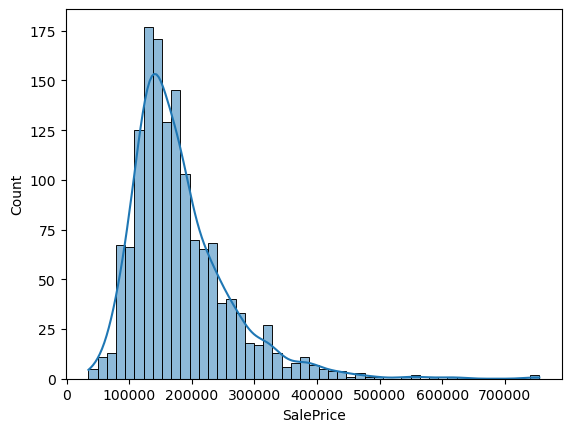

In [20]:
sns.histplot(df_t['SalePrice'], kde = True)

In the graph above we can observe the following things: - It slightly deviates from a normal distribution. - It's skewed. - It has some outliers

---
#### Relationship Between the Target Variable and Predictors

- Do we think about this variable when we are buying a house
- If so, how important would this variable be
- Is this information already described in any other variable

We can print out all the columns and take a closer look

In [55]:
sorted(list(df_t.columns))

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'Sa

- OverallQual - a tricky variable, an interesting exercise would be to predict 'OverallQual' using all the other variables available
- YearBuilt
- Neighborhood
- TotalBsmtSF
- GrLivArea

Now we check those relationships with our target varriable `SalePrice`

1. Numberical Varriables

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

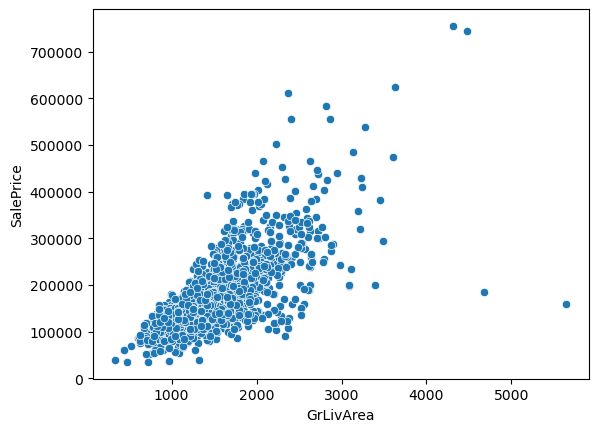

In [34]:
# var = 'GrLivArea'
data = df_t[['SalePrice', 'GrLivArea']]
# data.plot.scatter(x = var, y = 'SalePrice', ylim = (0,800000))
# sns.scatterplot(x='GrLivArea', y= 'SalePrice')

# data.plot.scatter(x='SalePrice', y='GrLivArea')

sns.scatterplot(y='SalePrice', x='GrLivArea', data = data)

- There's a linear relationship

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

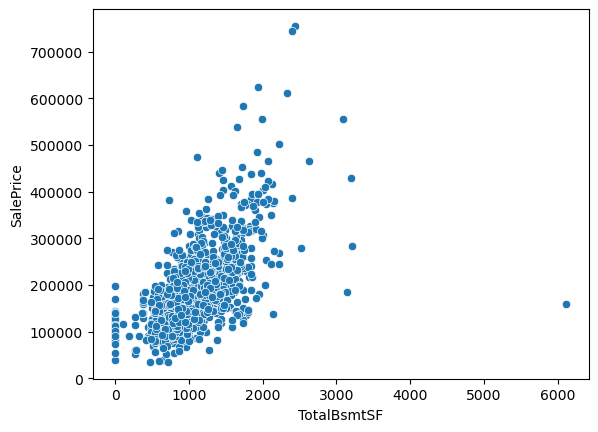

In [56]:
var = 'TotalBsmtSF'
data = df_train[['SalePrice',var]]
sns.scatterplot(x=var, y='SalePrice', data = data)

- Here, we can see a quadratic relationship.

---
### 2. Categorical Variables

(-0.5, 9.5, 0.0, 800000.0)

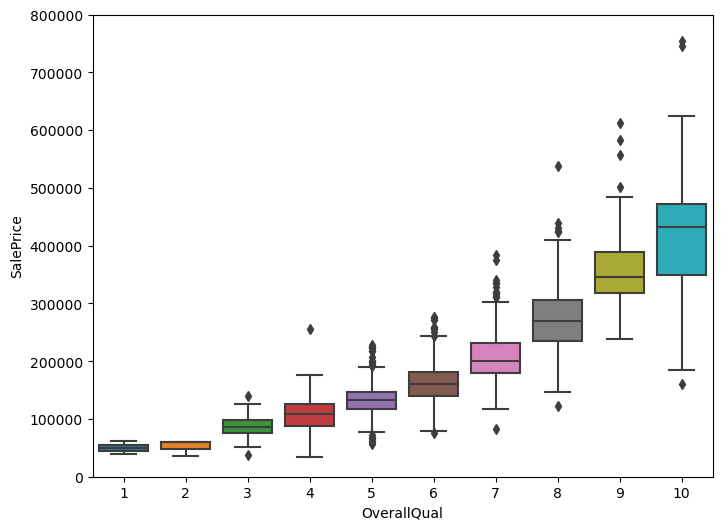

In [57]:
var = 'OverallQual'
data = df_t[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

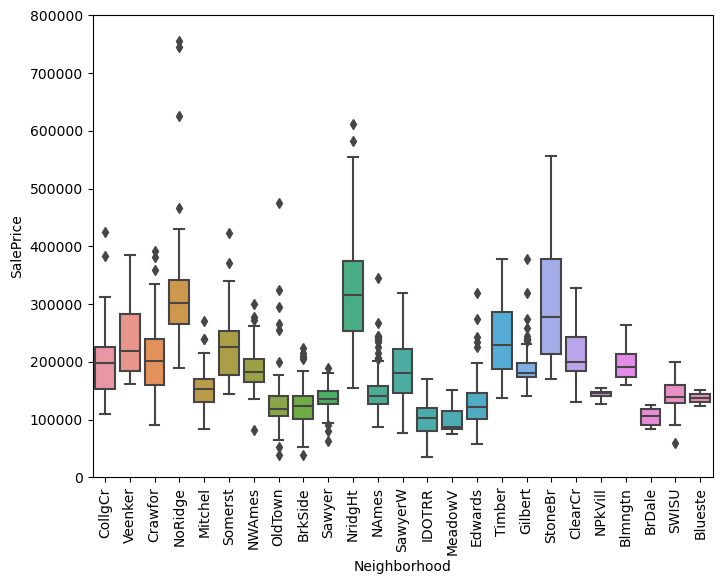

In [58]:
# Neighborhood
var = 'Neighborhood'
data = df_t[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

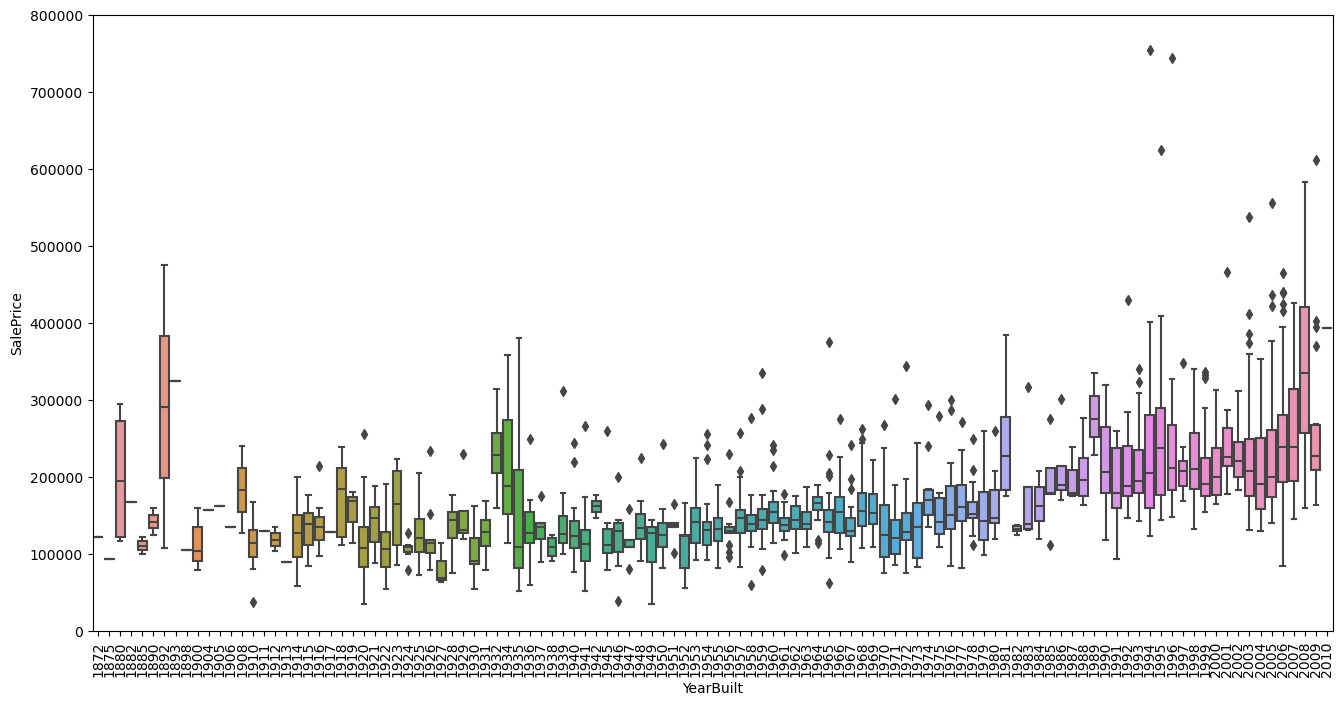

In [59]:
# YearBuilt
var = 'YearBuilt'
data = df_t[['SalePrice',var]]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

---
### 3. Multivariate Analysis

#### 1. Correlation Matrix

In [60]:
# correlation matrix
corrmat = df_t.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="RdYlGn_r")

ValueError: could not convert string to float: 'RL'

In [49]:
corrmat = df_t.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_t[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

ValueError: could not convert string to float: 'RL'

These are the variables most correlated with SalePrice. Our thoughts on this:

- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
- 'GarageCars' and 'GarageArea' are also among the most strongly correlated variables. The number of cars that fit into a garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
- 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to be able to say that our first guess was right :).
- 'FullBath'?? Really?
- 'TotRmsAbvGrd' and 'GrLivArea' – twin brothers again.
- 'YearBuilt': It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Therefore, we could also look at the problem as time-series analysis but we will get into that later.